-- before fitting machine learning models for a time series data we need to consider
outliers, 
constant variance, 
abrupt changes in the model.

# Installing Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import statsmodels.api as sm
import math
import statsmodels.formula.api as smf

C:\Users\bhushan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [69]:
%matplotlib inline


 # Reading in Bitcoin Datasets
 #reading the 'data' as 'train' and 'testing data' as 'test'

In [3]:
 
train = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

# Data Description

In [4]:
print(train.shape)
print(test.shape)

(2906, 24)
(14, 23)


In [5]:
train.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [6]:
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


-- Converting the date format 

In [7]:
from dateutil.parser import parse
from datetime import datetime

def convert(Date):
    holder = []
    for i in Date:
        tp = parse(i).timestamp()
        dt = datetime.fromtimestamp(tp)
        holder.append(dt)
    return np.array(holder)

In [8]:
date = train['Date'].values
date_n = convert(date)
train['Date'] = date_n
train.head()


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [9]:
date = test['Date'].values
date_n = convert(date)
test['Date'] = date_n
test.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2018-02-01,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2018-02-02,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2018-02-03,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2018-02-04,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2018-02-05,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


-- Setting Date columns as index

In [10]:
train= train.set_index('Date')
train.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [11]:
test= test.set_index('Date')
test.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-01,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,2.603080e+12,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
2018-02-02,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,2.603080e+12,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2018-02-03,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,2.603080e+12,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
2018-02-04,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,2.603080e+12,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
2018-02-05,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,2.603080e+12,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [12]:
train.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


# Missing value Treatment

In [13]:
# checking for missing values
train.isnull().any()

btc_market_price                                       False
btc_total_bitcoins                                      True
btc_market_cap                                         False
btc_trade_volume                                        True
btc_blocks_size                                         True
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                            True
btc_hash_rate                                          False
btc_difficulty                                          True
btc_miners_revenue                                     False
btc_transaction_fees                                    True
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions      

--so from the above it is evident that btc_total_bitcoins, btc_trade_volume, btc_block_size, btc_median_confirmation_time,
btc_difficulty, btc_transaction_fee have the missing values

-- Filling the missing values with method 'pad'

In [14]:
 train = train.fillna(method = 'pad')


In [15]:
train.isnull().any() # now by using pad method we have treated the missing values

btc_market_price                                       False
btc_total_bitcoins                                     False
btc_market_cap                                         False
btc_trade_volume                                       False
btc_blocks_size                                        False
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                           False
btc_hash_rate                                          False
btc_difficulty                                         False
btc_miners_revenue                                     False
btc_transaction_fees                                   False
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses                                 False
btc_n_transactions      

-- To check how market price has changed over time we used plots (both with and without scaling)

In [16]:
plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = train['btc_market_price'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(train['btc_market_price'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = train['btc_market_price'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(train['btc_market_price'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

C:\Users\bhushan\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


# Correlation between variables

--- Correlation matrix :
We can observe that the variables closest related to Market Price are     btc_Market_Cap,btc_Hash_Rate,btc_Difficulty,btc_Miner_Revenue, and Estimated_Transaction_Volume_USd

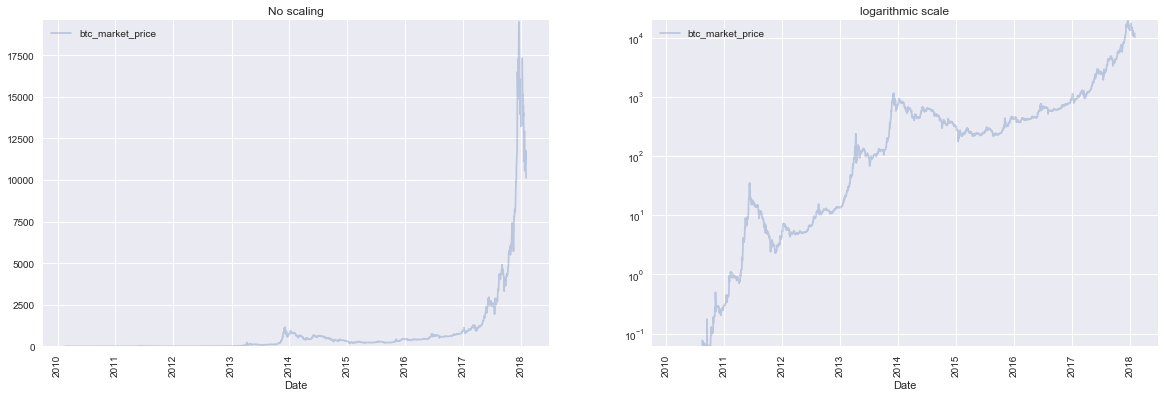

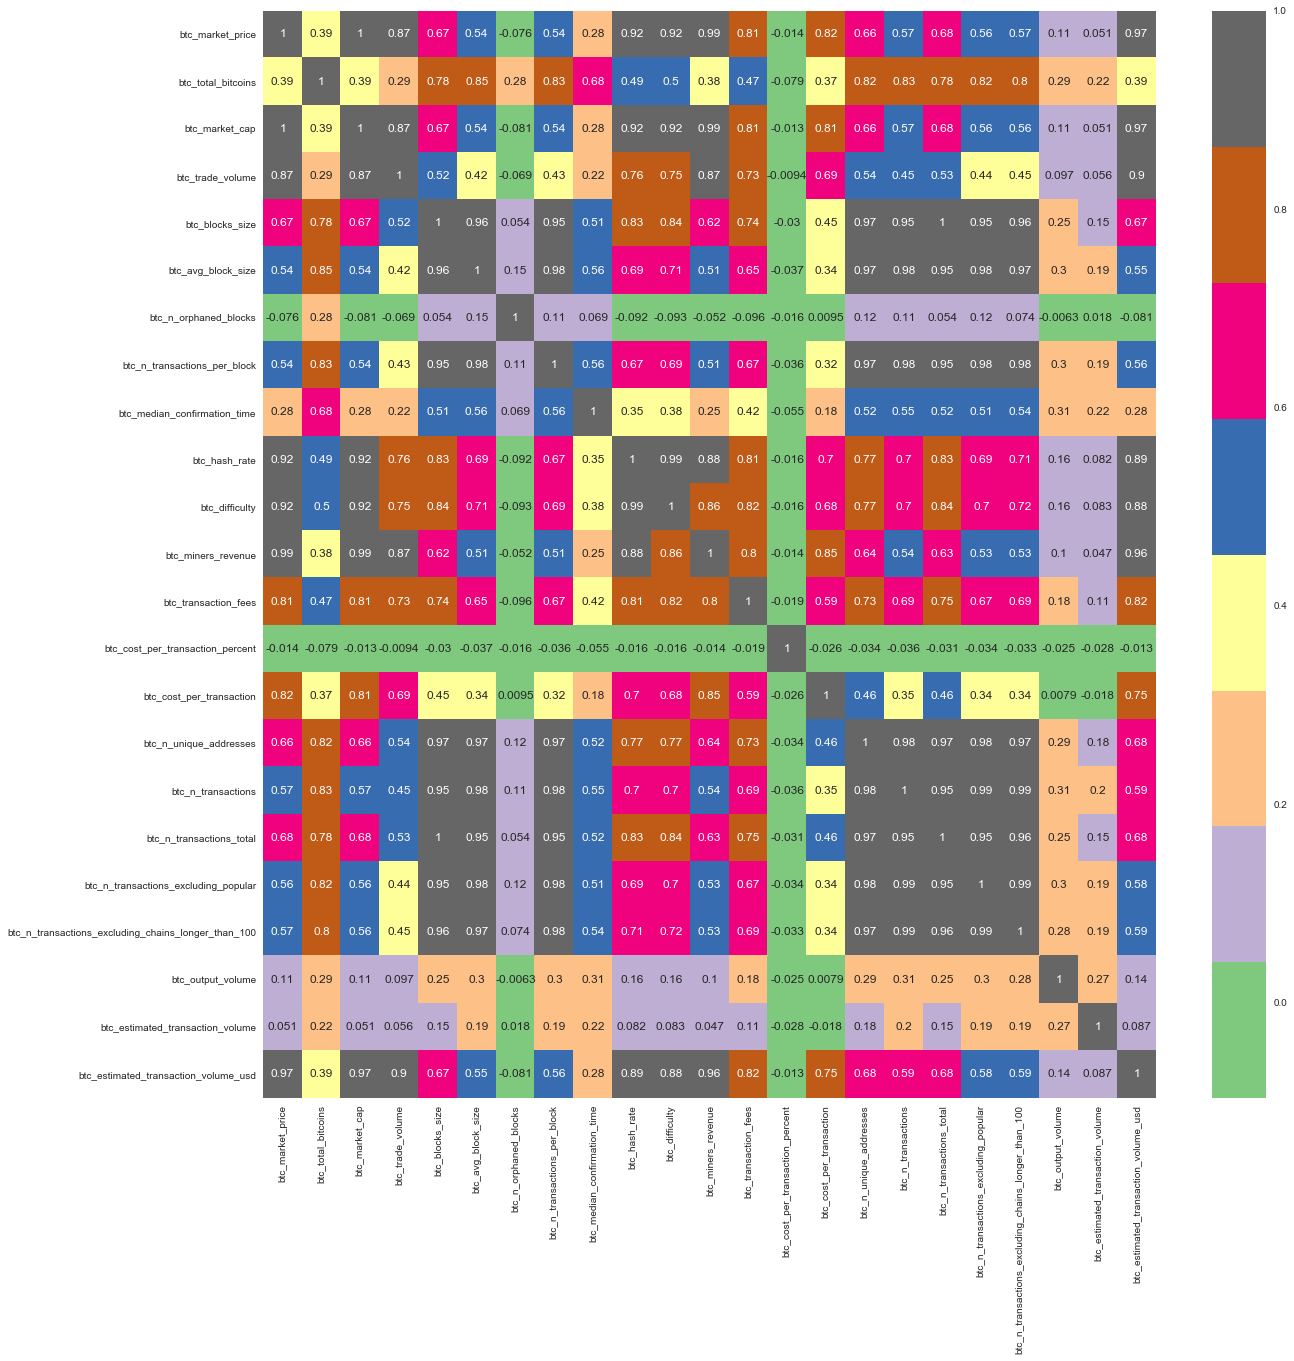

In [17]:
cm = train.corr()
plt.subplots(figsize = (20,20))
seaborn.heatmap(cm,cmap='Accent',annot = True)
plt.show()



# Choosing the best fit for the Regression model

---  As we know that multicollnearity and collinearity comes into play only for interpretation and are not a problem for predictions we have decided to check various possible variables based on correlation.

In [18]:
train.plot(x= 'btc_market_cap', y= 'btc_market_price')

--- there is a pattern in the residual plot below starting at 0 and increasing and decreasing linearly till 1250 on x-axis. this factor is taken into consideration when choosing the variables for regression model.

In [19]:
import statsmodels.api as sm
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = seaborn.residplot('btc_market_price','btc_market_cap', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
# 

Text(0,0.5,'Residuals')

In [20]:
X = train["btc_market_cap"]
y = train["btc_market_price"]


model = sm.OLS(y, X).fit()
predictions = model.predict(X) 


model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.890e+06
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -16010.
No. Observations:                2906   AIC:                         3.202e+04
Df Residuals:                    2905   BIC:                         3.203e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
btc_market_cap  5.991e-08   2.71e-11   2211.342      0.000    5.99e-08       6e-08
==============================================================================
Omnibus:                     1193.428   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5749.662
Skew:                           1.940   Prob(JB):                         0.00
Kurtosis:                       8.694   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Market price vs estimated transaction volume 


In [21]:
train.plot(x= 'btc_estimated_transaction_volume_usd', y= 'btc_market_price')

In [22]:
X = train["btc_estimated_transaction_volume_usd"]
y = train["btc_market_price"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 4.933e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -22606.
No. Observations:                2906   AIC:                         4.521e+04
Df Residuals:                    2905   BIC:                         4.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
btc_estimated_transaction_volume_usd   3.88e-06   1.75e-08    222.102      0.000    3.85e-06    3.91e-06
==============================================================================
Omnibus:                     1430.555   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153409.050
Skew:                           1.368   Prob(JB):                         0.00
Kurtosis:                      38.489   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- from the below residual plot we can say that there is heterscedasticity which is not good. as the prediction value increases the variance increases.

In [23]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = seaborn.residplot('btc_market_price','btc_estimated_transaction_volume_usd', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



Text(0,0.5,'Residuals')

--- btc_market_price vs btc_miners_revenue

In [24]:
train.plot(x= 'btc_miners_revenue', y= 'btc_market_price')

In [25]:
model = smf.ols(formula = "btc_market_price ~ btc_miners_revenue", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.073e+05
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:31   Log-Likelihood:                -21341.
No. Observations:                2906   AIC:                         4.269e+04
Df Residuals:                    2904   BIC:                         4.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -37.1081      7.441     -4.987      0.000     -51.698     -22.518
btc_miners_revenue     0.0004   1.22e-06    327.512      0.000       0.000       0.000
==============================================================================
Omnibus:                     1162.099   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117450.907
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                      34.089   Cond. No.                     6.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----  residuals have clustering and dispersion is also random

In [26]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = seaborn.residplot('btc_market_price','btc_miners_revenue', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



Text(0,0.5,'Residuals')

----- btc_market_price vs btc_difficulty

In [27]:
train.plot(x= 'btc_difficulty', y= 'btc_market_price')

In [28]:
model = smf.ols(formula = "btc_market_price ~ btc_difficulty", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:34   Log-Likelihood:                -23975.
No. Observations:                2906   AIC:                         4.795e+04
Df Residuals:                    2904   BIC:                         4.797e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -81.0920     18.752     -4.325      0.000    -117.860     -44.324
btc_difficulty  5.668e-09   4.62e-11    122.769      0.000    5.58e-09    5.76e-09
==============================================================================
Omnibus:                     2561.072   Durbin-Watson:                   0.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159389.076
Skew:                           3.886   Prob(JB):                         0.00
Kurtosis:                      38.439   Cond. No.                     4.43e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.43e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----  not a random dspersion but has some pattern

In [29]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = seaborn.residplot('btc_market_price','btc_difficulty', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



Text(0,0.5,'Residuals')

---- btc_market_price vs btc_hash_rate

In [30]:
train.plot(x= 'btc_hash_rate', y= 'btc_market_price')

In [31]:
model = smf.ols(formula = "btc_market_price ~ btc_hash_rate", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.620e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:36   Log-Likelihood:                -23886.
No. Observations:                2906   AIC:                         4.778e+04
Df Residuals:                    2904   BIC:                         4.779e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -63.9491     18.119     -3.529      0.000     -99.476     -28.422
btc_hash_rate     0.0007    5.7e-06    127.290      0.000       0.001       0.001
==============================================================================
Omnibus:                     2350.231   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128008.454
Skew:                           3.419   Prob(JB):                         0.00
Kurtosis:                      34.787   Cond. No.                     3.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-- some heterscedasticity

In [32]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = seaborn.residplot('btc_market_price','btc_hash_rate', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


Text(0,0.5,'Residuals')

--- regression with all the variables to find the significant ones

In [33]:
model = smf.ols(formula = "btc_market_price ~ btc_total_bitcoins+btc_market_cap+btc_trade_volume+btc_blocks_size+btc_avg_block_size+btc_n_orphaned_blocks+btc_n_transactions_per_block+btc_median_confirmation_time+btc_hash_rate+btc_difficulty+btc_miners_revenue+btc_transaction_fees+btc_cost_per_transaction_percent+btc_cost_per_transaction+btc_n_unique_addresses+btc_n_transactions+btc_n_transactions_total+btc_n_transactions_excluding_popular+btc_n_transactions_excluding_chains_longer_than_100+btc_output_volume+btc_estimated_transaction_volume+btc_estimated_transaction_volume_usd", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.110e+06
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:39   Log-Likelihood:                -11985.
No. Observations:                2906   AIC:                         2.402e+04
Df Residuals:                    2883   BIC:                         2.415e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                               7.8257      1.389      5.635      0.000       5.103      10.549
btc_total_bitcoins                                  -4.453e-06   2.39e-07    -18.595      0.000   -4.92e-06   -3.98e-06
btc_market_cap                                       5.761e-08   1.19e-10    482.590      0.000    5.74e-08    5.78e-08
btc_trade_volume                                     3.105e-09   2.36e-09      1.314      0.189   -1.53e-09    7.74e-09
btc_blocks_size                                        -0.0211      0.001    -35.481      0.000      -0.022      -0.020
btc_avg_block_size                                     20.2400      5.773      3.506      0.000       8.921      31.559
btc_n_orphaned_blocks                                  -0.7452      0.386     -1.931      0.054      -1.502       0.011
btc_n_transactions_per_block                           -0.0147      0.003     -5.071      0.000      -0.020      -0.009
btc_median_confirmation_time                            0.5930      0.090      6.564      0.000       0.416       0.770
btc_hash_rate                                       -2.278e-05    1.2e-06    -19.055      0.000   -2.51e-05   -2.04e-05
btc_difficulty                                       7.817e-11   1.15e-11      6.817      0.000    5.57e-11    1.01e-10
btc_miners_revenue                                   5.917e-06   7.86e-07      7.532      0.000    4.38e-06    7.46e-06
btc_transaction_fees                                   -0.1806      0.007    -26.469      0.000      -0.194      -0.167
btc_cost_per_transaction_percent                     3.183e-05      0.000      0.200      0.841      -0.000       0.000
btc_cost_per_transaction                                2.6606      0.047     56.181      0.000       2.568       2.754
btc_n_unique_addresses                                  0.0001   1.31e-05     10.168      0.000       0.000       0.000
btc_n_transactions                                      0.0001   3.97e-05      2.898      0.004    3.72e-05       0.000
btc_n_transactions_total                             1.146e-05   3.13e-07     36.557      0.000    1.08e-05    1.21e-05
btc_n_transactions_excluding_popular                  -5.7e-05   3.08e-05     -1.851      0.064      -0.000    3.37e-06
btc_n_transactions_excluding_chains_longer_than_100  5.631e-05   4.07e-05      1.383      0.167   -2.35e-05       0.000
btc_output_volume                                    1.382e-07   1.39e-07      0.993      0.321   -1.35e-07    4.11e-07
btc_estimated_transaction_volume                     7.244e-07   1.12e-06      0.649      0.516   -1.46e-06    2.91e-06
btc_estimated_transaction_volume_usd                 1.963e-08   2.49e-09      7.89

---- For highly correlated variables

In [34]:
model = smf.ols(formula = "btc_market_price ~ btc_hash_rate+btc_market_cap+btc_difficulty+btc_miners_revenue+btc_estimated_transaction_volume_usd", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.974e+06
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:39   Log-Likelihood:                -14807.
No. Observations:                2906   AIC:                         2.963e+04
Df Residuals:                    2900   BIC:                         2.966e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               23.3182      0.925     25.217      0.000      21.505      25.131
btc_hash_rate                        -4.094e-05   2.09e-06    -19.554      0.000    -4.5e-05   -3.68e-05
btc_market_cap                        5.342e-08   2.06e-10    259.895      0.000     5.3e-08    5.38e-08
btc_difficulty                        4.068e-10    1.8e-11     22.579      0.000    3.72e-10    4.42e-10
btc_miners_revenue                    3.887e-05   1.08e-06     35.950      0.000    3.68e-05     4.1e-05
btc_estimated_transaction_volume_usd -1.125e-08   5.12e-09     -2.197      0.028   -2.13e-08   -1.21e-09
==============================================================================
Omnibus:                      683.232   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33295.778
Skew:                           0.184   Prob(JB):                         0.00
Kurtosis:                      19.579   Cond. No.                     5.14e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


--- narrowing down the variables to get the best model

In [35]:
model = smf.ols(formula = "btc_market_price ~btc_miners_revenue+btc_estimated_transaction_volume_usd", data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 6.986e+04
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:05:39   Log-Likelihood:                -20965.
No. Observations:                2906   AIC:                         4.194e+04
Df Residuals:                    2903   BIC:                         4.195e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -24.1728      6.555     -3.688      0.000     -37.025     -11.321
btc_miners_revenue                       0.0003    3.8e-06     77.420      0.000       0.000       0.000
btc_estimated_transaction_volume_usd  1.088e-06   3.72e-08     29.266      0.000    1.01e-06    1.16e-06
==============================================================================
Omnibus:                     1659.338   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           191103.807
Skew:                           1.750   Prob(JB):                         0.00
Kurtosis:                      42.573   Cond. No.                     6.60e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--- There is some heteroscedasticity but this can be considered as the best one when we scale.Market Capitalization and Estimated Transaction Volume are highly correlated, only one will be included in the model. And because Difficulty and Hash Rate are highly correlated,we have included only one in the model

In [36]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = seaborn.residplot('btc_miners_revenue','btc_estimated_transaction_volume_usd', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



Text(0,0.5,'Residuals')

# knn Regression


--- creating splits and applied scaling to the test set that we computed for the training set and changed the X_train and X_valid to dataframe just for convienience

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

#X = train.drop('btc_market_price','',axis=1)
X= train[['btc_hash_rate','btc_market_cap','btc_difficulty','btc_miners_revenue','btc_estimated_transaction_volume_usd','btc_output_volume','btc_n_transactions_excluding_popular']]
y = train[['btc_market_price']]
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.columns = X.columns
X_valid_scaled.columns = X.columns
X_test_scaled.columns = X_test.columns
y_train.columns = y.columns
y_valid.columns = y.columns


knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train_scaled, y_train)

print(knnreg.predict(X_valid_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_train_scaled, y_train)))


ValueError: operands could not be broadcast together with shapes (14,22) (7,) (14,22) 

In [38]:
fig, subaxes = plt.subplots(5,1, figsize=(15,7))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

for thisaxis, K in zip(subaxes, [1, 3, 5, 10, 25]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)
    y_predict_output = knnreg.predict(X_train_scaled)
    thisaxis.plot(X_train.index, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train.index, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

--- fitting the training values on valid data (Cross validation)

In [166]:
knnreg = KNeighborsRegressor(n_neighbors = 3).fit(X_train_scaled, y_train)

print(knnreg.predict(X_valid_scaled))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_valid_scaled, y_valid)))

[[  5.71889000e+00]
 [  2.40460000e+02]
 [  9.03966667e+01]
 [  4.41496667e+02]
 [  4.66419667e+00]
 [  1.43909530e+01]
 [  3.31966667e+00]
 [  2.40629823e+03]
 [  7.81223500e+02]
 [  1.14413000e+01]
 [  7.81370333e+00]
 [  2.56666333e-01]
 [  5.71662982e+03]
 [  5.10573333e+00]
 [  1.06133333e-01]
 [  1.21242600e+01]
 [  3.08166467e+01]
 [  2.75723333e+02]
 [  8.55826667e+02]
 [  1.17906667e+01]
 [  0.00000000e+00]
 [  7.98486767e+01]
 [  2.65163333e+02]
 [  2.56666333e-01]
 [  7.68581000e-01]
 [  0.00000000e+00]
 [  5.15821333e+00]
 [  2.36233333e-01]
 [  5.80114604e+02]
 [  7.08000000e-02]
 [  1.14030000e+01]
 [  4.88300000e+00]
 [  1.40700000e+01]
 [  4.02181667e+00]
 [  3.30210000e+02]
 [  1.16824611e+03]
 [  4.79196667e+02]
 [  3.93986667e+02]
 [  2.40493333e+02]
 [  1.16396657e+02]
 [  5.95440000e+02]
 [  1.24920000e+02]
 [  1.18037267e+01]
 [  5.76330000e+02]
 [  2.00215233e+01]
 [  6.63163246e+02]
 [  3.70073333e+02]
 [  2.54400000e+02]
 [  2.48530000e-01]
 [  5.20535833e+02]


---- predicting the values for valid dataset (Created from splitting data into train(75%) and valid(25%)

In [39]:
y_valid_predict = knnreg.predict(X_valid_scaled)
knnreg_predict = pd.DataFrame(list(zip(y_valid['btc_market_price'],y_valid_predict)),columns=['Actual','Predicted'])
knnreg_predict

,Actual,Predicted
0,5.830010,[7.08514453724]
1,265.850000,[247.6488]
2,101.899980,[106.66586]
3,453.390000,[424.9132]
4,3.230000,[5.1148152]
5,14.100000,[11.7084675092]
6,3.255000,[5.0705995996]
7,2501.191343,[2745.07312636]
8,778.493500,[809.29928502]
9,11.127000,[14.6870848]


--- Predicting the market price on testing data 

In [40]:
pd.DataFrame(knnreg.predict(X_test_scaled),columns=['Prediction'])

NameError: name 'X_test_scaled' is not defined

# Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression().fit(X_train_scaled, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (valid): {}'
     .format(linreg.score(X_valid_scaled, y_valid)))

linear model coeff (w): [[ -6.42872979e+01   1.87967419e+04   1.14877998e+01  -3.16302878e+03
    2.21263564e+01  -5.62184215e+00  -4.44771107e+01   2.76629177e+01
   -5.01999852e+02   2.14801040e+02   3.04210405e+02  -2.63274734e+02
    2.36076507e+00   4.34659839e+02   1.49053728e+02   4.87481871e+01
    3.28921011e+03  -2.98098748e+01   2.57993832e+01   4.96813914e+00
    1.89284897e+00   1.30904783e+02]]
linear model intercept (b): [-0.71841743]
R-squared score (training): 0.9999576403498146
R-squared score (valid): 0.9999580828591564


In [170]:
y_valid_predict = linreg.predict(X_valid_scaled)
linreg_predict = pd.DataFrame(list(zip(y_valid['btc_market_price'],y_valid_predict)),columns=['Actual','Predicted'])
linreg_predict


,Actual,Predicted
0,5.830010,[6.1628354943]
1,265.850000,[260.859912583]
2,101.899980,[114.50387825]
3,453.390000,[442.719313016]
4,3.230000,[3.74375772722]
5,14.100000,[30.7074616984]
6,3.255000,[-4.23038753753]
7,2501.191343,[2498.40339007]
8,778.493500,[792.60766679]
9,11.127000,[15.0069940972]


In [171]:
pd.DataFrame(linreg.predict(X_test_scaled),columns=['Prediction'])

,Prediction
0,9056.749032
1,8887.871970
2,9069.840656
3,8400.475619
4,6763.694707
5,7590.487921
6,8070.965800
7,8260.050501
8,8553.633256
9,8297.419700


# Ridge Regression with Scaled Data

In [172]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Bitcoin dataset')   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_valid_scaled, y_valid)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))


Bitcoin dataset
ridge regression linear model intercept: [ 24.32432003]
ridge regression linear model coeff:
[[ -4.56726812e+02   3.31501782e+03   1.33992169e+03   4.96703294e+02
   -2.08975688e+02  -8.90248892e+01  -2.51908703e+01   9.66328030e+01
    2.10793684e+03   2.21540266e+03   2.98411790e+03   9.26185530e+02
   -1.53520014e+00   2.48319885e+03   6.72443687e+02   4.39040476e+01
    5.24984014e+02  -1.92890884e+02  -2.17327754e+02  -2.07910916e+01
   -3.38466170e+01   2.57633988e+03]]
R-squared score (training): 0.967
R-squared score (test): 0.968
Number of non-zero features: 22


In [173]:
y_valid_predict = linridge.predict(X_valid_scaled)
linridge_predict = pd.DataFrame(list(zip(y_valid['btc_market_price'],y_valid_predict)),columns=['Actual','Predicted'])
linridge_predict

,Actual,Predicted
0,5.830010,[-32.5147691725]
1,265.850000,[256.833278974]
2,101.899980,[54.2556437307]
3,453.390000,[434.697359904]
4,3.230000,[-69.9350491992]
5,14.100000,[115.508052962]
6,3.255000,[-92.3581808582]
7,2501.191343,[3216.92496841]
8,778.493500,[1087.21945154]
9,11.127000,[-127.784269714]


# Ridge Regression Prediction

In [174]:
pd.DataFrame(linridge.predict(X_test_scaled),columns=['Prediction'])

,Prediction
0,10284.815864
1,11005.930249
2,9858.815152
3,10300.082577
4,9723.251054
5,10406.822649
6,9515.493955
7,9424.328395
8,9567.534573
9,9272.852585


# Ridge Regression with regularization parameter : alpha

In [175]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_valid = linridge.score(X_valid_scaled, y_valid)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_valid))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 22, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
num abs(coeff) > 1.0: 22, r-squared training: 1.00, r-squared test: 1.00

Alpha = 10.00
num abs(coeff) > 1.0: 22, r-squared training: 0.98, r-squared test: 0.98

Alpha = 20.00
num abs(coeff) > 1.0: 22, r-squared training: 0.97, r-squared test: 0.97

Alpha = 50.00
num abs(coeff) > 1.0: 21, r-squared training: 0.92, r-squared test: 0.92

Alpha = 100.00
num abs(coeff) > 1.0: 22, r-squared training: 0.85, r-squared test: 0.85

Alpha = 1000.00
num abs(coeff) > 1.0: 21, r-squared training: 0.45, r-squared test: 0.44



# Lasso Regression with Scaled Data

In [176]:
from sklearn.linear_model import Lasso


linlasso = Lasso(alpha=20.00, max_iter = 10000).fit(X_train_scaled, y_train)

print('Bitcoin dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))

print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_valid_scaled, y_valid)))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))

Bitcoin dataset
lasso regression linear model intercept: [ 25.4333647]
lasso regression linear model coeff:
[     0.          17163.53577952      0.              0.              0.
     -0.              0.              0.              0.              0.
      0.              0.             -0.            282.16199695      0.
      0.            350.7667608       0.              0.              0.
     -0.              0.        ]
R-squared score (training): 0.993
R-squared score (test): 0.993

Non-zero features: 3


In [177]:
y_valid_predict = linlasso.predict(X_valid_scaled)
linlasso_predict = pd.DataFrame(list(zip(y_valid['btc_market_price'],y_valid_predict)),columns=['Actual','Predicted'])
linlasso_predict

,Actual,Predicted
0,5.830010,40.688959
1,265.850000,338.795575
2,101.899980,132.796904
3,453.390000,513.016959
4,3.230000,35.706980
5,14.100000,56.743445
6,3.255000,34.429782
7,2501.191343,2521.069622
8,778.493500,904.990883
9,11.127000,43.781388


In [178]:
pd.DataFrame(linlasso.predict(X_test_scaled),columns=['Prediction'])

,Prediction
0,8552.883317
1,8413.772481
2,8585.758081
3,8013.150240
4,6571.173720
5,7310.923886
6,7677.881370
7,7821.797947
8,8089.626681
9,7900.694755


In [179]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_valid = linlasso.score(X_valid_scaled, y_valid)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_valid))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 8, r-squared training: 1.00, r-squared test: 1.00

Alpha = 1.00
Features kept: 8, r-squared training: 1.00, r-squared test: 1.00

Alpha = 2.00
Features kept: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 3.00
Features kept: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 5.00
Features kept: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 10.00
Features kept: 4, r-squared training: 1.00, r-squared test: 1.00

Alpha = 20.00
Features kept: 3, r-squared training: 0.99, r-squared test: 0.99

Alpha = 50.00
Features kept: 2, r-squared training: 0.96, r-squared test: 0.96



# Polynomial Regression

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_friedman1

X_F1, Y_F1 = make_friedman1(n_samples = 100,
                           n_features = 10, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_F1, Y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (valid): {:.3f}'
     .format(linreg.score(X_valid, y_valid)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_valid, y_train, y_valid = train_test_split(X_F1_poly, Y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (valid): {:.3f}\n'
     .format(linreg.score(X_valid, y_valid)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_valid, y_train, y_valid = train_test_split(X_F1_poly, Y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (valid): {:.3f}'
     .format(linreg.score(X_valid, y_valid)))

linear model coeff (w): [  5.24059074   6.31457795   1.22426051  11.48846529   4.44399735
  -1.83136028  -1.17466654   1.32015651  -0.63343759  -1.72964591]
linear model intercept (b): 2.180
R-squared score (training): 0.776
R-squared score (valid): 0.636

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[ -1.09945299e+14  -4.83857487e+00   2.58962934e+01  -3.56337665e+01
  -1.79177324e+01   1.56258270e+01   1.00090384e+01   1.93489614e+01
   2.37137759e+01  -1.13205846e+01   1.21604266e+01  -2.13211153e+01
  -3.45198641e+00   1.14778271e+01   1.38460605e+00   1.62039278e+01
   2.98647552e+00  -7.39112549e+00   6.48361123e+00   5.73050330e+00
   2.20063132e+01  -2.67137814e+01   3.10663531e+00   8.31813785e+00
   6.02600388e+00  -3.03376702e-01  -7.29855602e-01   2.39950691e+00
   1.20007129e+01  -1.28467002e+00   2.98930568e+01   7.10178439e+00
  -6.63815296e+00  -1.37958478e+01  -1.69355551e+00  -5.44

# Support vector machines

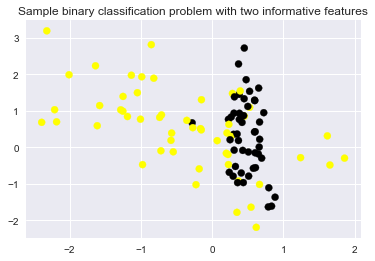

In [184]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


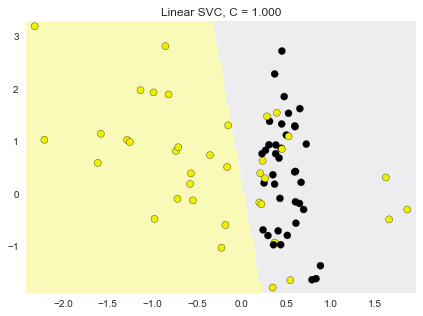

In [185]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_valid, y_train, y_valid = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

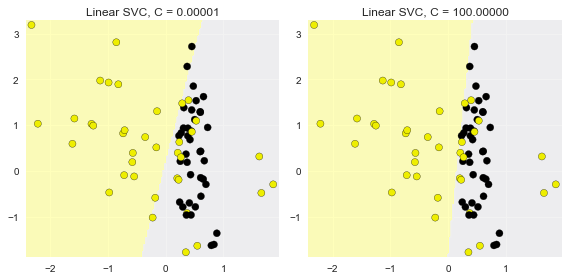

In [186]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_valid, y_train, y_valid = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()